# 신경망

가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습할 수 있다

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예
- 왼쪽부터 입력층, 맨 왼쪽을 출력, 중간을 은닉층이라한다
- 0, 1, 2층으로 표현한데 파이썬언어의 인덱스와 같은 표현을 사용한다

### 3.1.2 퍼셉트론 복습
- b 편향은 뉴런이 얼마나 쉽게 활성화되느냐를 제어한다
- w 가중치는 각 신호의 영향력을 제어한다
- 입력신호의 총합이 h(x)라는 함수를 거쳐 y의 출력이 된다

### 3.1.3 활성화 함수의 등장
- 활성화 함수(activation function)는 신호의 총합이 활성화를 일으키는지를 정한다
- 가중치가 달린 입력 신호와 편향의 총합을 계산한 뒤 이를 a라 하며 h(a)에 넣어 y를 출력하는 흐름이다

## 3.2 활성화 함수
- 활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 계단 함수라 한다
- 활성화 함수의 종류 계단함수의 장단점

### 3.2.1 시그모이드 함수
- $ h(x) = \dfrac{1}{1+exp(-x)} $
- 시그모이드 함수를 이용하여 0 ~ 1의 값으로 표현할 수 있다

### 3.2.2 계단 함수 구현

In [4]:
def step_function(x):
    if x > 0:
        return 1
    else :
        return 0
    
def step_function(x):
    y = x > 0
    return y.astype(np.int) # numpy 배열을 다룰 수 있도록 함수를 수정

In [8]:
%matplotlib inline

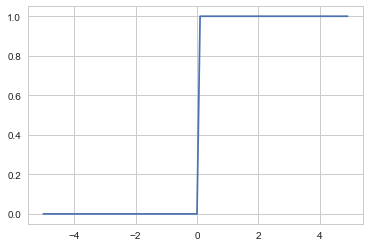

In [9]:
x = np.arange(-5.0, 5, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.show()

### 3.2.4 시그모이드 함수 구현

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
x = np.array([-1, 1, 2])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

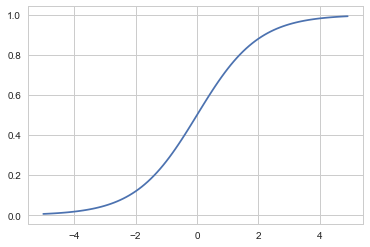

In [12]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교
불연속성과 연속성의 차이가 있지만 전체적인 모양과 의미는 같다 둘다 비선형함수이다

### 3.2.6 비선형함수
- 입력값을 상수배만큼 변하는 함수를 선형함수라 한다. $f(x) = ax + b$이며 a, b는 상수이다. 선형함수는 곧은 1개의 직선이다
- 신경망에서는 비선형 함수를 사용해야만 층을 깊게하는 의미가 있다
- 선형함수를 사용하여 다층 신경망을 구현할경우 $y(x) = h(h(h(x))) $가 되므로 곱셈을 세번 수행한식이며 이는 $y(x) = ax$ 와 같은 표현이된다 즉 은닉층이 없는 네트워크가 된다

### 3.2.7 ReLU 함수
- Rectified Linear Unit

In [15]:
def relu(x):
    return np.maximum(0, x)

## 3.3 다차원 배열의 계산

### 3.3.1 다차원배열

### 3.3.2 행렬의 곱

### 3.3.3 신경망에서의 행렬의 곱

## 3.4 신경망 구현하기

In [20]:
X = np.array([1, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

In [22]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [23]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [25]:
def identify_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3)
Y

array([0.31682708, 0.69627909])

In [26]:
def init_function():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['B2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['B3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']
    
    a1 = np.dot(x, W1) + B1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + B2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + B3
    y = identify_function(a3)
    
    return y

network = init_function()
x = np.array([1, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])